In [1]:
# "np" and "plt" are common aliases for NumPy and Matplotlib, respectively.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Support we have some pizza size(Diameter) and price

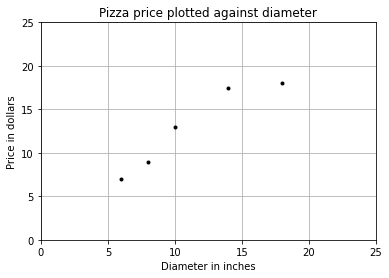

In [1]:
# X represents the features of our training data, the diameters of the pizzas.
# A scikit-learn convention is to name the matrix of feature vectors X. 
# Uppercase letters indicate matrices, and lowercase letters indicate vectors.
X = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)

# y is a vector representing the prices of the pizzas.
y = [7, 9, 13, 17.5, 18]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [15]:
X = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y = [7, 9, 13, 17.5, 18]

# Create an instance of the estimator(估計器), LinearRegression
model = LinearRegression()
# Fit the model on the training data
model.fit(X, y)
# Predict the price of a pizza with a diameter that has never been seen before
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]
print(f'A 12" pizza should cost: {predicted_price:.2f}')

A 12" pizza should cost: 13.68


# Simple Linear Regression is using $y=\alpha+\beta x$
$y$ is output that we predict, $x$ is predictor, $\alpha$ is intercapt term, $\beta$ is ceofficient.

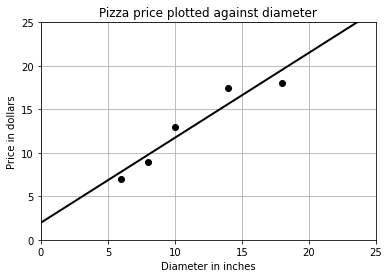

In [5]:
X = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y = [7, 9, 13, 17.5, 18]

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'ko')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot([0, 25], [1.97, 26.37], color='k', linestyle='-', linewidth=2)
plt.show()

A linear relationship exists between the response variable and the explanatory variable. SLR models this relationship with a linear surface called a "hyperplane". A hyperplane is a subspace that has one dimension less than the ambient space that contains it.

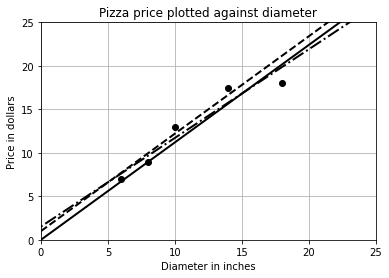

In [6]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'ko')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.plot([0, 25], [0, 28], color='k', linestyle='-', linewidth=2)
plt.plot([0, 25], [1, 29], color='k', linestyle='--', linewidth=2)
plt.plot([-1, 25], [0.5, 27], color='k', linestyle='-.', linewidth=2)
plt.show()

# Cost function(loss function) $y-f(x)$
Goal: Choose $\alpha$, $\beta$ so that $y-f(x)$ is miniminzed.
## Residual sum of squares(RSS)
# $SS_{res}=\sum^n_{i=1}(y_i-f(x_i))^2$

In [7]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y = [7, 9, 13, 17.5, 18]

# Create an instance of the estimator, LinearRegression
model = LinearRegression()
# Fit the model on the training data
model.fit(X, y)
# Predict the price of a pizza with a diameter that has never been seen before
test_pizza = np.array([[12]])
predicted_price = model.predict(test_pizza)[0]
print('A 12" pizza should cost: $%.2f' % predicted_price)

print('Residual sum of squares: %.2f' % np.mean((model.predict(X) - y) ** 2))

A 12" pizza should cost: $13.68
Residual sum of squares: 1.75


# Ordinary Least Squares (OLS)

# Variance 變異數

# $var(x)=\frac{\sum^n_{i=1}(x_i-\overline{x})^2}{n-1}$

In [8]:
import numpy as np

X = np.array([[6], [8], [10], [14], [18]]).reshape(-1, 1)
x_bar = X.mean()
print(x_bar)

# Note that we subtract one from the number of training instances when calculating the sample variance. 
# This technique is called Bessel's correction. It corrects the bias in the estimation of the population variance
# from a sample.
variance = ((X - x_bar)**2).sum() / (X.shape[0] - 1)
print(variance)

11.2
23.2


In [9]:
print(np.var(X, ddof=1)) # numpy have a library "var" 

23.2


# Covariance 共變異數
# $cov(x,y)=\frac{\sum^n_{i=1}(x_i-\overline{x})(y_i-\overline{y})}{n-1}$

In [10]:
# We previously used a List to represent y.
# Here we switch to a NumPy ndarray, which provides a method to calulcate the sample mean.
y = np.array([7, 9, 13, 17.5, 18])

y_bar = y.mean()
# We transpose X because both operands must be row vectors
covariance = np.multiply((X - x_bar).transpose(), y - y_bar).sum() / (X.shape[0] - 1)
print(covariance)
print(np.cov(X.transpose(), y)[0][1])

22.65
22.650000000000002


we can calculate now!
# $\beta = \frac{cov(x,y)}{var(x)} \approx 0.98$
# $\alpha = \overline{y}-\beta\overline{x} \approx 1.92$

# Evaluation model
# R-squared ( Coefficient of determination)
$SS_{tot}=\sum^{n}_{i=1}(y_i-\overline{y})^2$

$SS_{res}=\sum^{n}_{i=1}(y_i-f(x_i))^2$

$R^2 = 1-\frac{SS_{tot}}{SS_{res}}$

In [11]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = [7, 9, 13, 17.5, 18]

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = [11, 8.5, 15, 18, 11]

model = LinearRegression()
model.fit(X_train, y_train)
r_squared = model.score(X_test, y_test)
print(r_squared)

0.6620052929422553
